# Exploratory Data Analysis

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



### Data load and a glimpse overview

In [2]:
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

In [3]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
#let's convert 'Timestamp' column into a more readable view
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.5 MB


In [7]:
ratings.describe(include='all')

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209
mean,3.024512e+03,1.865540e+03,3.581564e+00,2000-10-22 19:41:35.404665856
min,1.000000e+00,1.000000e+00,1.000000e+00,2000-04-25 23:05:32
25%,1.506000e+03,1.030000e+03,3.000000e+00,2000-08-03 11:37:17
50%,3.070000e+03,1.835000e+03,4.000000e+00,2000-10-31 18:46:46
75%,4.476000e+03,2.770000e+03,4.000000e+00,2000-11-26 06:42:19
max,6.040000e+03,3.952000e+03,5.000000e+00,2003-02-28 17:49:50
std,1.728413e+03,1.096041e+03,1.117102e+00,NaN


In [8]:
ratings.groupby('UserID').agg({'Rating': 'count'}).reset_index().sort_values('Rating', ascending=True)

,UserID,Rating
946,947,20
4067,4068,20
2529,2530,20
340,341,20
5257,5258,20
...,...,...
1180,1181,1521
1940,1941,1595
4276,4277,1743
1679,1680,1850


In [9]:
ratings.groupby('MovieID').agg({'Rating': 'count'}).reset_index().sort_values('Rating', ascending=True)

,MovieID,Rating
389,402,1
2032,2214,1
3152,3382,1
2034,2217,1
2035,2218,1
...,...,...
466,480,2672
1120,1210,2883
1106,1196,2990
253,260,2991


In [10]:
print("Duplicate entries:", ratings.duplicated().sum())

Duplicate entries: 0


In [11]:
print("Duplicate ratings:", ratings.loc[:, ['UserID', 'MovieID']].duplicated().sum())

Duplicate ratings: 0


We can confirm that: 

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Each user has at least 20 ratings
- There are no NULL values
- There are no fully duplicated rows or ratings in the table
- The ratings are collected during 2000-11-29 - 2003-02-28 period

In [12]:
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [13]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [15]:
users.describe(include='all')

,UserID,Gender,Age,Occupation,Zip-code
count,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3020.500000,NaN,30.639238,8.146854,NaN
std,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,1.000000,0.000000,NaN
25%,1510.750000,NaN,25.000000,3.000000,NaN
50%,3020.500000,NaN,25.000000,7.000000,NaN
75%,4530.250000,NaN,35.000000,14.000000,NaN


In [16]:
print('The number of unique users:', users.UserID.nunique())
print('Genders presented in the dataset:', users.Gender.unique())
print('Age groups presented in the dataset:', np.sort(users.Age.unique()))
print('Occupations presented in the dataset:', np.sort(users.Occupation.unique()))

The number of unique users: 6040
Genders presented in the dataset: ['F' 'M']
Age groups presented in the dataset: [ 1 18 25 35 45 50 56]
Occupations presented in the dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


According to the information from the README.txt file we can create 'occupation_dict' describing each occupation value:

In [17]:
occupation_dict = {
    0: "other",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

In [18]:
users['Occupation'] = users['Occupation'].map(occupation_dict)

In [19]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


Let's check if there are new null values occured

In [20]:
users.Occupation.isna().sum()

0

Also, let's check if all values in Age column are valid according to the data description:

In [21]:
print("Users with invalid Age values:", users[~users['Age'].isin([1, 18, 25, 35, 45, 50, 56])])

Users with invalid Age values: Empty DataFrame
Columns: [UserID, Gender, Age, Occupation, Zip-code]
Index: []


In [22]:
print("Duplicate entries in users data:", users.duplicated().sum())

Duplicate entries in users data: 0


We can see that: 
* Gender is denoted by a "M" for male and "F" for female and these are only values in the 'Gender' column
* Age column describes not a precise age but an age group. All the values are valid
* All Occupation values are valid
* There are no NULL values in the dataframe
* There are no duplicates 

In [23]:
movies = pd.read_csv('data/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='latin1')

In [58]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [26]:
movies.describe(include='all')

,MovieID,Title,Genres
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Toy Story (1995),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


Let's check if all genres in the dataset are valid with respect of README.txt dataset description

In [27]:
print("Movies with invalid Genres:")
valid_genres = set(['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 
                    'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
invalid_genres = movies['Genres'].str.split('|').explode().unique()
invalid_genres = set(invalid_genres) - valid_genres
print(invalid_genres)

Movies with invalid Genres:
set()


In [28]:
print("Duplicate entries in movies data:", movies.duplicated().sum())

Duplicate entries in movies data: 0


We can conclude that: 
* There are no NULL values in the movies dataframe
* There are no fully same movie titles in the dataset
* The most popular genre is 'Drama'
* All Genre values are valid
* There are no duplicates in the table 

### Statistical overview

Some research questions will need a merged dataset

In [29]:
data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

In [30]:
assert len(data) == len(ratings)   #to check for new duplicates after the join

##### Ratings distribution:

In [31]:
#prepare a function for distribution visualizations
def vis_distribution(data, column_name, palette='viridis'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=data, palette='viridis')
    plt.title(column_name + 'Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

In [32]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


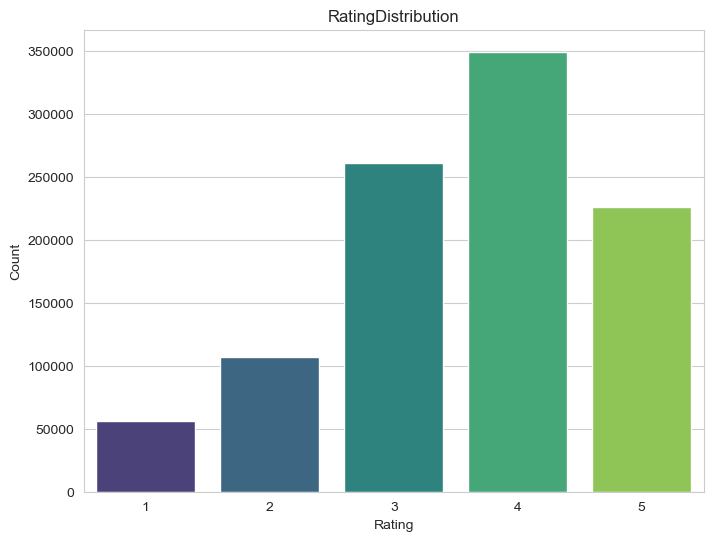

In [33]:
vis_distribution(data = ratings, column_name = 'Rating')

Most ratings are on the higher end of the scale, particularly at 4 stars. We can account on this fact to prevent bias in our models

##### Ratings dynamic:

In [34]:
ratings['YearMonth'] = ratings['Timestamp'].dt.to_period('M')
ratings_by_time = ratings.groupby('YearMonth').size().reset_index(name='Count')
ratings_by_time['YearMonth'] = ratings_by_time['YearMonth'].dt.to_timestamp()

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

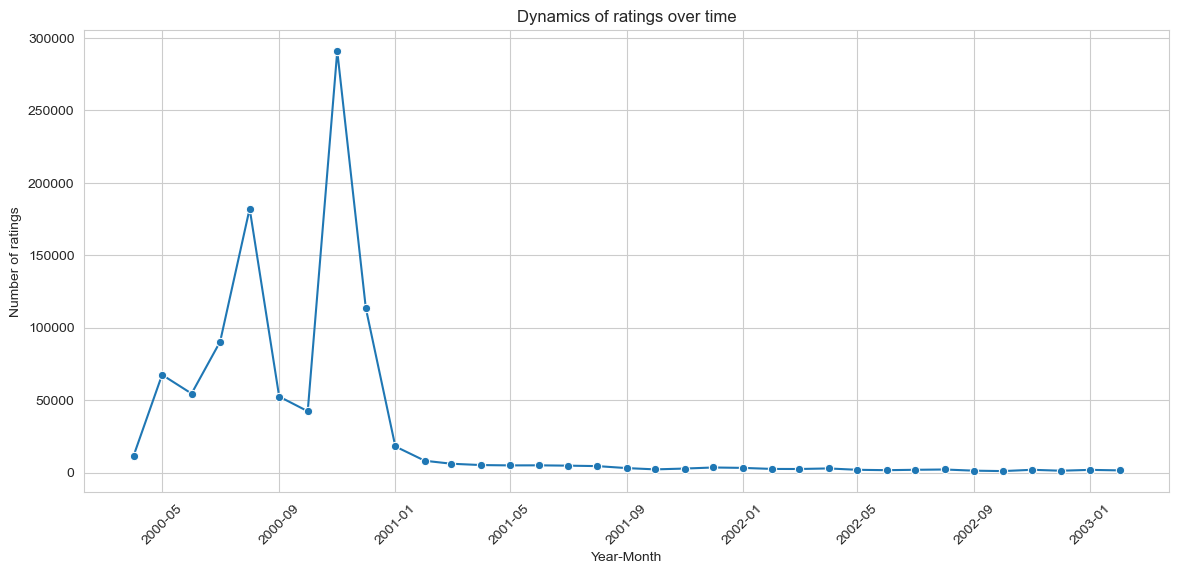

In [35]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='YearMonth', y='Count', data=ratings_by_time, marker='o')
plt.title('Dynamics of ratings over time')
plt.xlabel('Year-Month')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There are fluctuations in the number of ratings, with some periods experiencing higher activity than others. This pattern might be influenced by various factors such as the release of popular movies or changes in the user base. 

Most ratings are collected during the year of 2000. There are few ratings made throughout 2001-2003 which may be connected with some input errors.

##### Number of ratings per movie

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


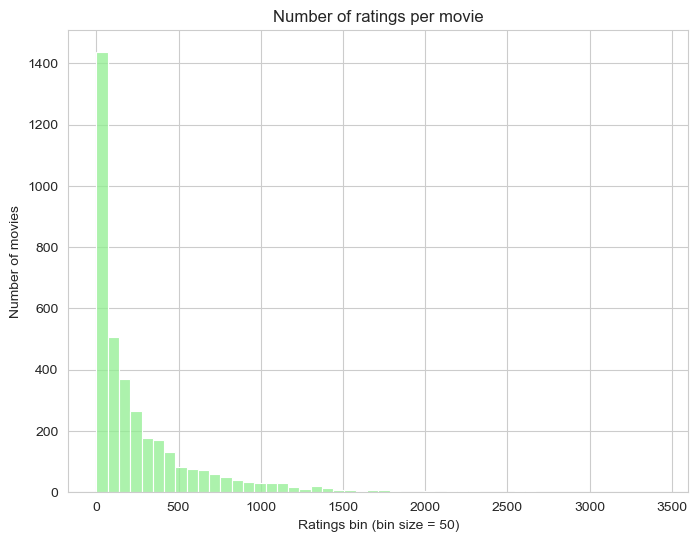

In [36]:
#Number of ratings per movie
ratings_per_movie = ratings.groupby('MovieID').size()
bin_size = 50

plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_movie, bins=bin_size, kde=False, color='lightgreen')
plt.title('Number of ratings per movie')
plt.xlabel(f'Ratings bin (bin size = {bin_size})')
plt.ylabel('Number of movies')
plt.show()

Most movies receive less than 50 ratings. Meanwhile, some movies are very popular, receiving more than 2000 ratings.

Top 10 movies by the number of ratings are:   

In [37]:
data.groupby('Title').agg({'UserID': 'count', 'Rating': 'mean'}).reset_index().sort_values('UserID', ascending=False).head(10)

,Title,UserID,Rating
127,American Beauty (1999),3428,4.317386
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
3154,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
1789,Jurassic Park (1993),2672,3.763847
2894,Saving Private Ryan (1998),2653,4.337354
3293,Terminator 2: Judgment Day (1991),2649,4.058513
2112,"Matrix, The (1999)",2590,4.315830
258,Back to the Future (1985),2583,3.990321
2990,"Silence of the Lambs, The (1991)",2578,4.351823


TOP movies by the number of ratings not always receive high scores. 

##### Users activity in terms of ratings count 

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


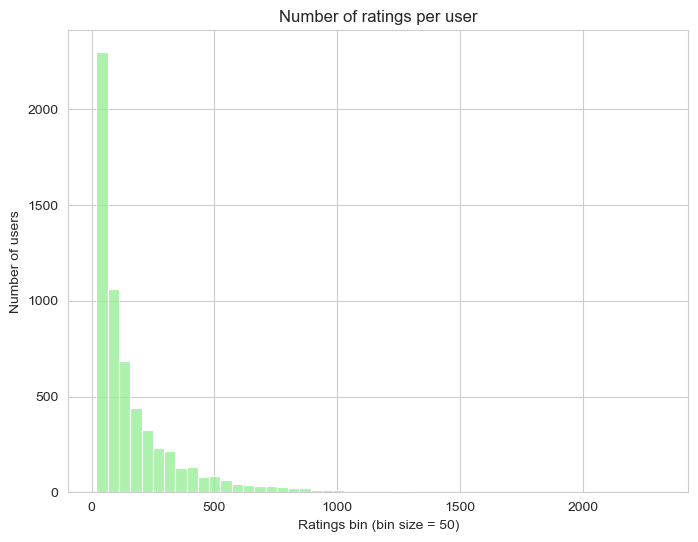

In [38]:
# Number of ratings per user
ratings_per_user = data.groupby('UserID').size()
bin_size = 50

plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_user, bins=bin_size, kde=False, color='lightgreen')
plt.title('Number of ratings per user')
plt.xlabel(f'Ratings bin (bin size = {bin_size})')
plt.ylabel('Number of users')
plt.show()

While some users are very active, the majority rate fewer movies (<50)

##### Distribution of age groups and labels by age group

In [39]:
age_labels = {
    1: 'Under 18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}

data['AgeGroup'] = data['Age'].map(age_labels)

In [40]:
age_distribution = data['AgeGroup'].value_counts().sort_index()

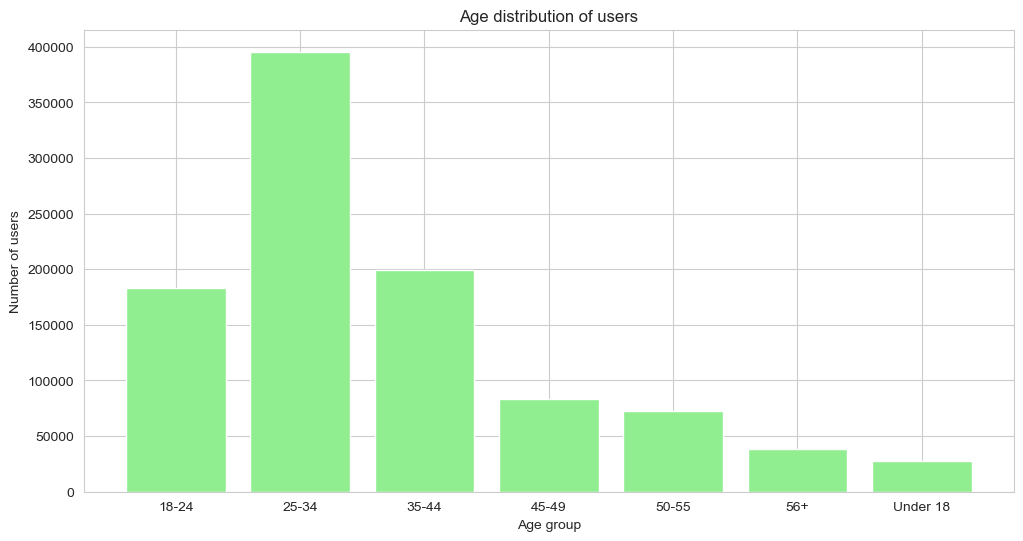

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(age_distribution.index, age_distribution.values, color='lightgreen')
plt.xlabel('Age group')
plt.ylabel('Number of users')
plt.title('Age distribution of users')
plt.show()

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

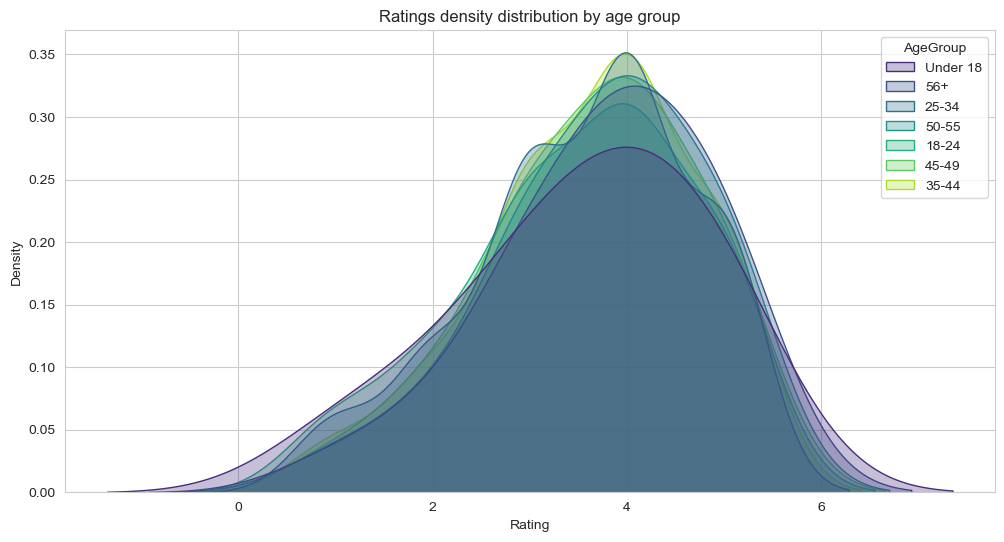

In [42]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='Rating', hue='AgeGroup', fill=True, common_norm=False, palette='viridis', alpha=0.3, bw_adjust=5)
plt.title('Ratings density distribution by age group')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

The age distribution of users indicates that the majority of users are in the 25-34 age group, followed by the 18-24 and 35-44 age groups. And we can see that there is no significant differences in ratings distribution by age groups. 

##### Distribution of ratings by gender

In [43]:
gender_distribution = users['Gender'].value_counts()

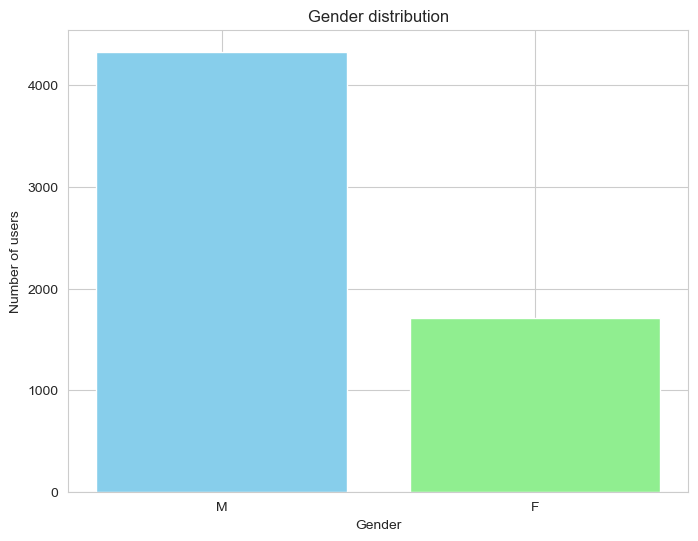

In [44]:

plt.figure(figsize=(8, 6))
plt.bar(gender_distribution.index, gender_distribution.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Number of users')
plt.title('Gender distribution')
plt.show()

In [45]:
print('% of men in the users dataset:', round(len(users[users['Gender'] == 'M']) / len(users), 2)*100, '%')
print('% of men in the users dataset:', round(len(users[users['Gender'] == 'F']) / len(users), 2)*100, '%')

% of men in the users dataset: 72.0 %
% of men in the users dataset: 28.000000000000004 %


/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

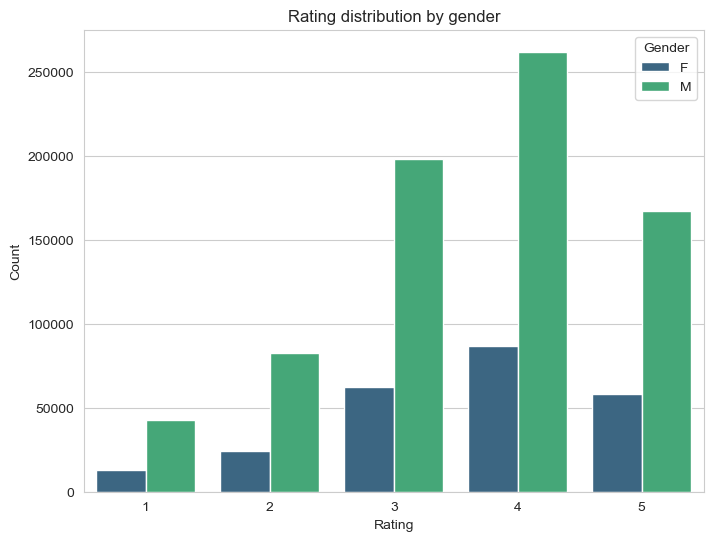

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', hue='Gender', data=data, palette='viridis')
plt.title('Rating distribution by gender')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- There is a significant towards men in the data (72% of users are men). 
- We cannot see significant differences in ratings distribution by gender

##### Genres distribution

In [47]:
genre_count = movies['Genres'].str.split('|').explode().value_counts()

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


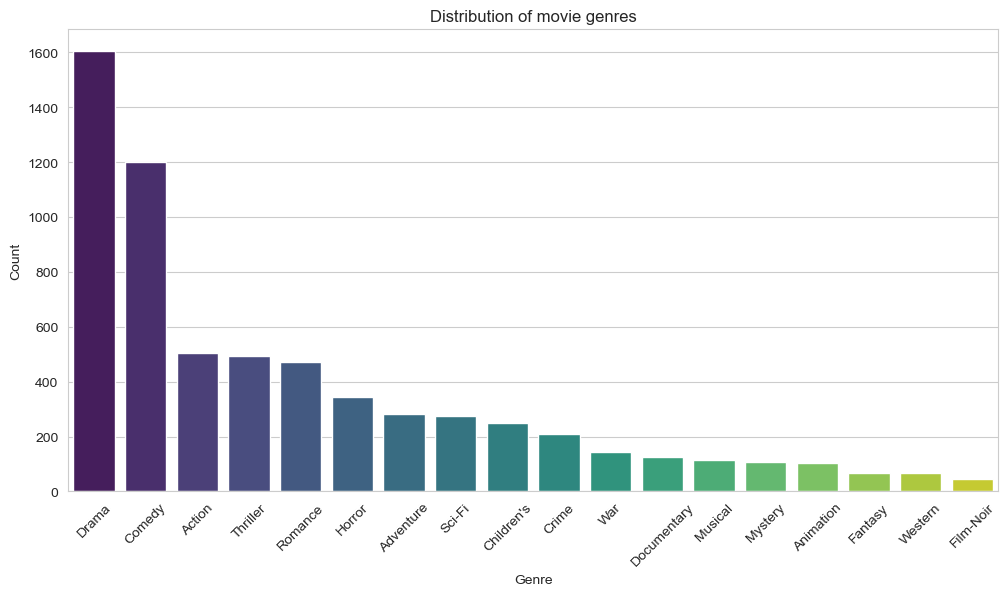

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.title('Distribution of movie genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [49]:
print('% of Drama and Comedy in the ratings dataset:', round(len(data[(data['Genres'] == 'Drama') | (data['Genres'] == 'Comedy')]) / len(data), 2)*100, '%') 

% of Drama and Comedy in the ratings dataset: 23.0 %


Users rate Drama and Comedy more actively than other genres.  

##### Top genres by gender

In [50]:
men_genres = data[data['Gender'] == 'M']['Genres'].str.split('|').explode().value_counts()

In [51]:
women_genres = data[data['Gender'] == 'F']['Genres'].str.split('|').explode().value_counts()

/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


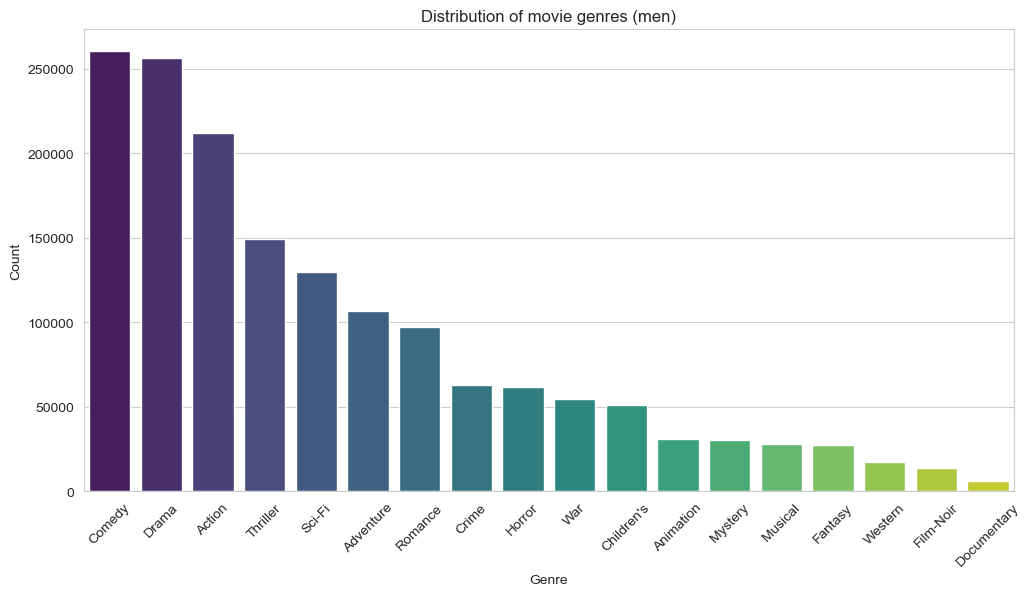

In [52]:
#men genres
plt.figure(figsize=(12, 6))
sns.barplot(x=men_genres.index, y=men_genres.values, palette='viridis')
plt.title('Distribution of movie genres (men)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/denisbotuk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


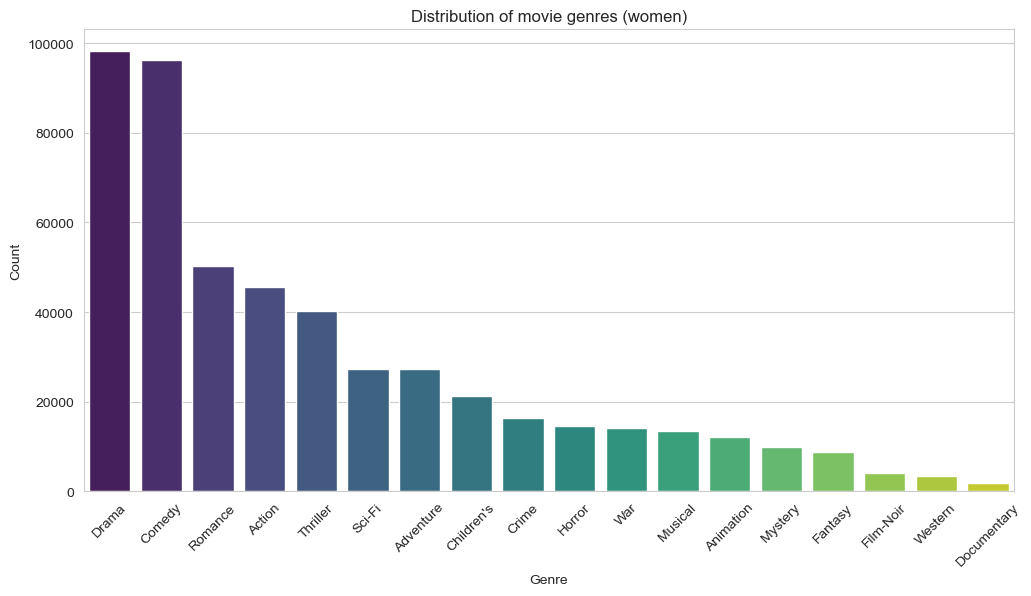

In [53]:
#men genres
plt.figure(figsize=(12, 6))
sns.barplot(x=women_genres.index, y=women_genres.values, palette='viridis')
plt.title('Distribution of movie genres (women)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the data, Drama and Comedy are the favorite genres for both men and women presented in the dataset. However, men show a strong preference for genres like Action, Thriller, Sci-Fi, and Adventure, which are rated higher compared to women's ratings in the same genres. Women favor Romance more than men.

##### Occupation distribution

In [54]:
occupation_distribution = users['Occupation'].value_counts().sort_values(ascending=False)

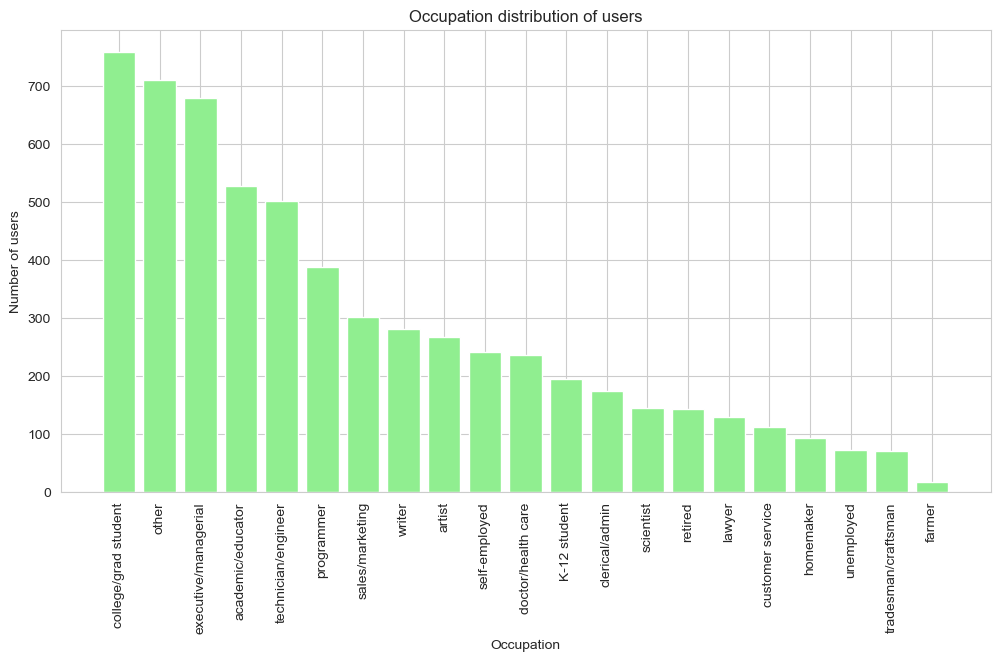

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(occupation_distribution.index, occupation_distribution.values, color='lightgreen')
plt.xlabel('Occupation')
plt.ylabel('Number of users')
plt.title('Occupation distribution of users')
plt.xticks(rotation=90)
plt.show()

In [56]:
occupation_ratings_distribution = data['Occupation'].value_counts().sort_values(ascending=False)

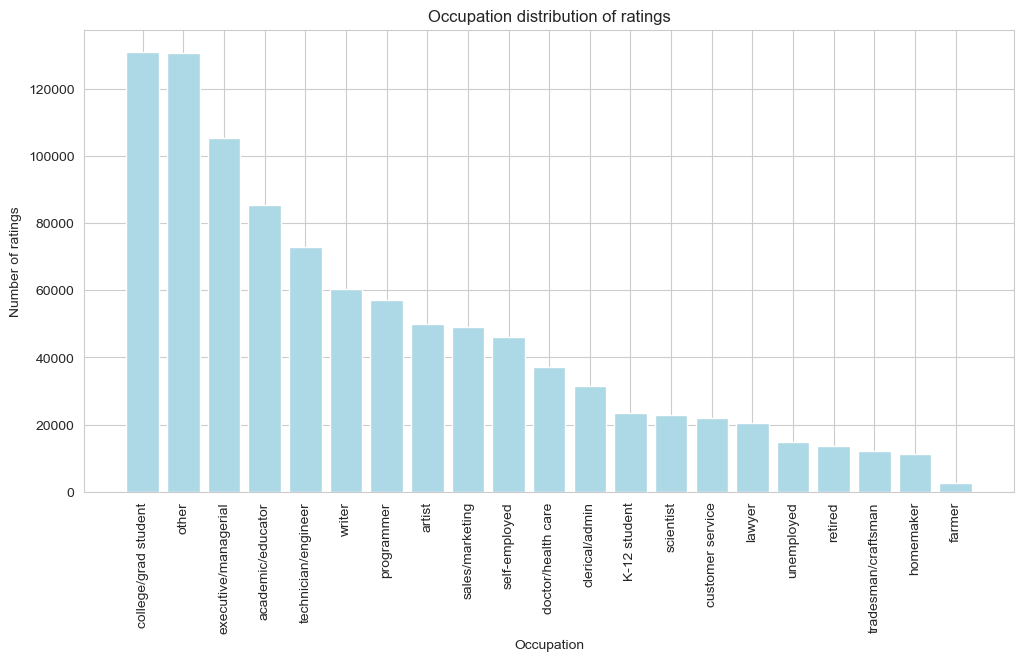

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(occupation_ratings_distribution.index, occupation_ratings_distribution.values, color='lightblue')
plt.xlabel('Occupation')
plt.ylabel('Number of ratings')
plt.title('Occupation distribution of ratings')
plt.xticks(rotation=90)
plt.show()

- College students is the most popular occupation group among all users, followed closely by executive/managerial roles. There is also a significant representation of academics and educators, technical/engineers, and programmers
- There is some differences in 'rating activities' among occupation groups (for example, we can see that writers are more active than programers in terms of ratings count despite being less presented in the users dataset).   

### Overall summary

Dataset Overview:
- UserIDs range between 1 and 6040.
- MovieIDs range between 1 and 3952.
- Ratings are on a 5-star scale, with whole-star ratings only.
- Each user has rated at least 20 movies.
- There are no NULL values or fully duplicated rows are present.
- There are no invalid values 
- The ratings were collected between November 29, 2000, and February 28, 2003. However, 

Ratings Distribution:
- Ratings tend to be on the higher end of the scale, with a significant number of 4-star ratings.
- There is no significant difference in the distribution of ratings across different age groups or genders.
- Men and women both prefer genres like Drama and Comedy, but men show a higher preference for Action, Thriller, Sci-Fi, and Adventure, whereas women rate Romance higher.
- Drama is the most popular genre, followed by Comedy. Users actively rate these genres more than others.

User data:
- The dataset includes demographic details such as gender, age, and occupation.
- Gender is represented as "M" for male and "F" for female, with men making up 72% of users.
- Age groups are categorized, with the majority of users in the 25-34 age group, followed by 18-24 and 35-44 age groups.
- Occupation data includes various roles, with college students being the most represented group, followed by executive/managerial roles, academics/educators, technical/engineers, and programmers.
- Different occupations show varying levels of rating activity. For instance, writers are more active in rating movies compared to programmers, despite being fewer in number.